# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import lxml.html as lx
import requests
import re
import requests_cache
requests_cache.install_cache("../craigslist1")

url1 = "https://www.sfchronicle.com/"
url2 = "https://www.sfchronicle.com/local/"
url3 = "https://www.sfchronicle.com/sports/"
url4 = "https://www.sfchronicle.com/food/"

def unique(list1): 
    '''
    Helper Function.
    '''
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    #print(unique_list)
    return unique_list
        
def content(url):
    '''
    Function to extract all the links(a href tags) from a given url(website)
    '''
    links = []
    str = "article"
    
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    
    for link in soup.find_all('a', href = True):
        if link.has_key('href'):
            if '/article' in link['href']:
                link = "https://www.sfchronicle.com" + link['href']
                links.append(link)
    links = unique(links)
    return links
        
links  = content(url1)
print(links)

['https://www.sfchronicle.com/politics/article/For-SF-s-Jeff-Adachi-life-was-all-about-13639840.php', 'https://www.sfchronicle.com/bayarea/article/Public-Defender-Jeff-Adachi-dies-13638785.php', 'https://www.sfchronicle.com/politics/article/Jeff-Adachi-s-biggest-fights-An-innocent-man-13639823.php', 'https://www.sfchronicle.com/politics/article/Matt-Gonzalez-to-lead-SF-Public-Defender-s-13639576.php', 'https://www.sfchronicle.com/opinion/editorials/article/Editorial-Jeff-Adachi-a-defender-with-grace-13639449.php', 'https://www.sfchronicle.com/athletics/article/Kyler-Murray-warns-A-s-not-to-hold-out-hope-13639888.php?src=hp_totn', 'https://www.sfchronicle.com/bayarea/article/Crews-resume-search-for-woman-trapped-by-13639364.php?src=hp_totn', 'https://www.sfchronicle.com/giants/article/Giants-analytics-loving-outfield-prospect-Drew-13639694.php?src=hp_totn', 'https://www.sfchronicle.com/warriors/article/Reports-Warriors-Draymond-Green-switching-to-13639355.php?src=hp_totn', 'https://www.

/anaconda3/lib/python3.7/site-packages/bs4/element.py:1654: UserWarning: has_key is deprecated. Use has_attr("href") instead.
  key))


__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [2]:
import numpy as np
import pandas as pd
import requests
import lxml.html as lx

url = "https://www.sfchronicle.com/entertainment/television/article/The-Latest-Empire-actor-turns-self-in-to-face-13633087.php"
def extractData(url):
        '''
        Function to extract data(title, text, author, date, date_updates) from the article. 
        Takes in the article url as parameter.
        '''
        mydict={}
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page, 'html.parser')
        
        #url
        url = url 
        
        #title
        for header in soup.find_all('h1', limit=1):
            title = header.text
            #print(title)
         
        #text
        text = soup.select('body p')
        text = [pt.get_text() for pt in text]
        #print(text)
        
        #author 
        if(soup.find('span', attrs={"class":"header-authors-name"})):
            author = soup.find('span', attrs={"class":"header-authors-name"}).text 
        else:
            author = ''
        #print(author)
        
        #date
        if(soup.find('time', attrs={"itemprop":"datePublished"})):
            date = soup.find('time', attrs={"itemprop":"datePublished"}).text
        else:
            date = ''
        #print(date)
        
        #date_updated
        if(soup.find('time', attrs={"itemprop":"dateModified"})):
            date_updated = soup.find('time', attrs={"itemprop":"dateModified"}).text
            date_updated = date_updated.split('Updated: ')
            date_updated = date_updated[1]
        else:
            date_updated = ''
        
        #final dictionary
        mydict = {'url':url, 'title': title, 'text': text, 'author': author, 'date': date, 'date_updated': date_updated, 'date_updated': date_updated }

        return mydict
        #print(mydict)
        
mydict = extractData(url)
print(mydict)

{'url': 'https://www.sfchronicle.com/entertainment/television/article/The-Latest-Empire-actor-turns-self-in-to-face-13633087.php', 'title': 'The Latest: Lawyer call Smollett man of character, integrity', 'text': ['CHICAGO (AP) — The Latest on the attack reported by Jussie Smollett (all times local):', '8:15 p.m.', 'Lawyers for Jussie Smollett say the Chicago Police Department put on an "organized law enforcement spectacle" when its superintendent detailed investigators\' findings about the alleged attack on the "Empire" actor.', "In a statement Thursday night, Smollett's legal team said Superintendent Eddie Johnson's comments had no place in the American legal system. At a news conference earlier in the day, Johnson said Smollett owes the city an apology and should admit what he did. Smollett is accused of paying two men to help stage the Jan. 29 attack.", "Smollett's lawyers say the presumption of innocence was trampled upon at the expense of Smollett.", 'The statement called Smollett

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [3]:
import numpy as np
import pandas as pd
import requests
import lxml.html as lx
import pandas as pd

category1url = "https://www.sfchronicle.com/us-world/"
category2url = "https://www.sfchronicle.com/business/"
category3url = "https://www.sfchronicle.com/local/"
final_df = pd.DataFrame([])

#category1 - us-world
def dataframes(categoryUrl):
    '''
    Get data frames of articles for the category: us-world. Takes in category url as parameter.
    '''
    df = pd.DataFrame([])
    links = content(categoryUrl)
    for link in links:
        mydict = extractData(link)
        mydict.update({'Category': "us-world"})
        dfCur = pd.DataFrame.from_dict(mydict)
        df = pd.concat([df, dfCur])
        
    #print(df)
    return df
    
category1df = dataframes(category1url)
#print(category1df)

#category2 - Biz+Tech
def dataframes(categoryUrl):
    '''
    get data frames of articles for the category: Biz+Tech. Takes in category url as parameter.
    '''
    df = pd.DataFrame([])
    links = content(categoryUrl)

    for link in links:
        #print(link)
        mydict = extractData(link)
        mydict.update({'Category': "Biz+Tech"})
        dfCur = pd.DataFrame.from_dict(mydict)
        df = pd.concat([df, dfCur])
    
    #print(df)    
    return df
    
category2df = dataframes(category2url)

#category3 - local
def dataframes(categoryUrl):
    '''
    get data frames of articles for the category: local. Takes in category url as parameter.
    '''
    df = pd.DataFrame([])
    links = content(categoryUrl)

    for link in links:
        #print(link)
        mydict = extractData(link)
        mydict.update({'Category': "local"})
        dfCur = pd.DataFrame.from_dict(mydict)
        df = pd.concat([df, dfCur])
        
    #print(df)
    return df

category3df = dataframes(category3url)

result = category1df.append(category2df, ignore_index=True)
final_result = result.append(category3df, ignore_index=True)
print(final_result)

/anaconda3/lib/python3.7/site-packages/bs4/element.py:1654: UserWarning: has_key is deprecated. Use has_attr("href") instead.
  key))


                                                    url  \
0     https://www.sfchronicle.com/entertainment/tele...   
1     https://www.sfchronicle.com/entertainment/tele...   
2     https://www.sfchronicle.com/entertainment/tele...   
3     https://www.sfchronicle.com/entertainment/tele...   
4     https://www.sfchronicle.com/entertainment/tele...   
5     https://www.sfchronicle.com/entertainment/tele...   
6     https://www.sfchronicle.com/entertainment/tele...   
7     https://www.sfchronicle.com/entertainment/tele...   
8     https://www.sfchronicle.com/entertainment/tele...   
9     https://www.sfchronicle.com/entertainment/tele...   
10    https://www.sfchronicle.com/entertainment/tele...   
11    https://www.sfchronicle.com/entertainment/tele...   
12    https://www.sfchronicle.com/entertainment/tele...   
13    https://www.sfchronicle.com/entertainment/tele...   
14    https://www.sfchronicle.com/entertainment/tele...   
15    https://www.sfchronicle.com/entertainment/tele... 

__Exercise 1.4.__ Deleted the question by mistake, my apologies to the grader!

# What topics has the Chronicle covered recently?

In [4]:
import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

#Dataframe for 3 categories from the previous question
result = category1df.append(category2df, ignore_index=True)
final_result = result.append(category3df, ignore_index=True)

new_datedf = final_result['date']
new_textdf = final_result['text']
result = pd.concat([new_datedf, new_textdf], axis=1, sort=False)
result = result.dropna(axis=0, how ='any', thresh=None, subset=None, inplace=False)

result = result.sort_values(by = 'date', ascending=True)
resultText = result['text']
#print(resultText)

#Additional array for characters to remove for frequency analysis
stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
             "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
             "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
             "'", "a.m.", "In", "@","$", "two", "like","make", "more", "She", "new", "could", "one", "Chronicle", "it", "th", "p.m.", "told", "he", "would", "He", "A", "AP", "''", ")", "It", "say", '"']
   
#To remove digits for frequency analysis
no_digits = []
for i in resultText:
    if not i.isdigit():
        no_digits.append(i)

resultText = ''.join(no_digits)

stopwords = nltk.corpus.stopwords.words("english")
words = nltk.word_tokenize(resultText)
words = [w for w in words if w not in stopwords]
words = [w for w in words if w not in stopwords2]
fdist1 = FreqDist(words)

#Most common wordss
print("The top 30 most common words in the us-world category is:")
fd_most_common = fdist1.most_common(30)
print(fd_most_common)

#PLOT
fdist1.plot(10, cumulative=True)
#plt.title('Frequency distributions for US-world category')
#plt.xlabel('Counts')
#plt.ylabel('frequency')
#plt.grid(axis='y', alpha=0.75)

#A hapax is a token that only occurs once within a document.
categort1hapaxes = fdist1.hapaxes()[:10]
print("The words that occur only once in the us-world category is:", categort1hapaxes)

#long words of a text
V = set(words)
long_words = [w for w in V if len(w) > 15]
long_words = long_words[:10]
print("The long words of the text in the us-world category is:", long_words)

The top 30 most common words in the us-world category is:
[('”', 1037), ('San', 417), ('Francisco', 389), ('people', 302), ('city', 244), ('years', 187), ('home', 173), ('year', 170), ('state', 156), ('We', 156), ('California', 155), ('?', 149), ('time', 141), ('first', 141), ('public', 139), ('percent', 135), ('Adachi', 134), ('police', 132), ('They', 126), ('help', 122), ('last', 117), ('back', 115), ('work', 112), ('company', 112), ('Bay', 104), ('million', 104), ('get', 102), ('many', 100), ('Smollett', 100), ('still', 99)]


<Figure size 640x480 with 1 Axes>

The words that occur only once in the us-world category is: ['newscast', 'Yolo', 'quaking', 'overflowing', 'banks.', 'CTCU', 'spaceship', 'floating', 'stars.Melissa', 'snuggles']
The long words of the text in the us-world category is: ['Francisco.HomeAway', 'said.ContactOver', 'hired.14,748,900AboutContactServicesSan', 'appearance.Smollett', 'patients.ServicesContactAll', 'AboutContactServicesFlabbergasted', 'HKnightSFChronicle', 'pic.twitter.com/vDBk4ehctIThe', 'Security.Nowadays', 'outright.OAKViolet']


According to the analysis of the text of the recent articles based on frequency distribution, words that occur only once and long words, the most common topics covered are San Francisco, California, Trump and money.

# Associate category with topics

# Topic analysis for category 1: us-world

The top 30 most common words in the us-world category is:
[('Smollett', 70), ('Contact', 38), ('Services', 37), ('Adachi', 27), ('Police', 26), ('Guaido', 26), ('Saturday', 20), ('Thursday', 19), ('police', 19), ("n't", 19), ('actor', 18), ('Maduro', 18), ('There', 17), ('San', 17), ('”', 17), ('state', 16), ('We', 16), ('Chicago', 15), ('Trump', 15), ('years', 15), ('Francisco', 15), ('At', 15), ('h', 14), ('Johnson', 14), ('As', 13), ('Jussie', 12), ('Associated', 12), ('President', 12), ('North', 12), ('Press', 11)]


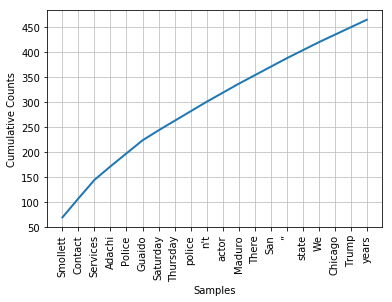

The words that occur only once in the us-world category is: ['Lawyers', 'Po', 'lega', 'inno', 'impecc', 'Actor', 'currently', 'season', 'person', 'condition']
The long words of the text in the us-world category is: ['grandfather-like', 'charmschoolchocolate.com', 'election-related', '//twitter.com/AP_A', 'sometimes-chaotic', '//www.instagram.com/yuri', 'Already-faltering', 'second-in-command']


In [8]:
import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

#nltk.download('punkt')
#nltk.download("stopwords")

category1df = dataframes(category1url)
category1Text = category1df['text']
category1Text = category1Text.to_string()

stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
             "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
             "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
             "'", "a.m.", "In", "it", "th", "p.m.", "told", "one", "two", "people"
              ,"he", "would", "He", "A", "AP", "''", ")", "It", "say", ""]
             
no_digits = []

for i in category1Text:
    if not i.isdigit():
        no_digits.append(i)

category1Text = ''.join(no_digits)

stopwords = nltk.corpus.stopwords.words("english")
words = nltk.word_tokenize(category1Text)
words = [w for w in words if w not in stopwords]
words = [w for w in words if w not in stopwords2]

fdist1 = FreqDist(words)
print("The top 30 most common words in the us-world category is:")
fd_most_common = fdist1.most_common(30)
print(fd_most_common)

#PLOT
fdist1.plot(20, cumulative=True)

#A hapax is a token that only occurs once within a document.
categort1hapaxes = fdist1.hapaxes()[:10]
print("The words that occur only once in the us-world category is:", categort1hapaxes)

#long words of a text
V = set(words)
long_words = [w for w in V if len(w) > 15]
print("The long words of the text in the us-world category is:", long_words)

# Topic analysis for category 1: biz+tech

The top 30 most common words in the us-world category is:
[('Services', 28), ('San', 27), ('Contact', 27), ('Francisco', 22), ('PG', 14), ('”', 13), ('U.S.', 11), ('Edwards', 11), ('company', 10), ('Airbnb', 10), ('Hound', 8), ('Trump', 8), ('rose', 8), ('deal', 7), ('California', 7), ('Hill', 7), ('program', 7), ('hosts', 7), ('If', 6), ('people', 6), ('reporter', 6), ('c', 6), ('proposed', 6), ('At', 6), ('That', 6), ('She', 6), ('Kopan', 6), ('companies', 6), ('time', 6), ('Many', 6)]


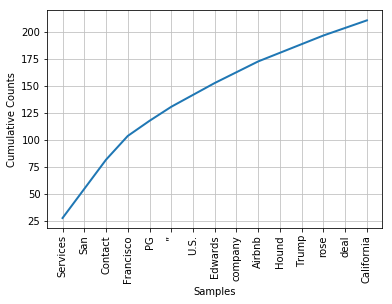

The words that occur only once in the us-world category is: ['traditional', 'men', 'Gentlemen', 'Clothiers', '-ye', 'curre', 'fondest', 'memories', 'close', 'cont']
The long words of the text in the us-world category is: ['Builder/developer', 'quasi-bankruptcy', 'Multiple-property', '//www.instagram.com/yuri', 'kindredsfhomes.com']


In [6]:
category2df = dataframes(category2url)
#print(category2df)

category2Text = category2df['text']
category2Text = category2Text.to_string()

stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
             "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
             "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
             "'", "a.m.", "In", "it", "We", "$", "Chronicle", "&", "E", "th", "p.m.", "told", "he", "would", "He", 
              "A", "AP", "''", ")", "It", "say", '"', "This","two", "S", "last", "new", "percent"]
             
no_digits = []

for i in category2Text:
    if not i.isdigit():
        no_digits.append(i)

category2Text = ''.join(no_digits)

stopwords = nltk.corpus.stopwords.words("english")
words = nltk.word_tokenize(category2Text)
words = [w for w in words if w not in stopwords]
words = [w for w in words if w not in stopwords2]

fdist1 = FreqDist(words)
print("The top 30 most common words in the us-world category is:")
fd_most_common = fdist1.most_common(30)
print(fd_most_common)

#PLOT
fdist1.plot(15, cumulative=True)

#A hapax is a token that only occurs once within a document.
categort1hapaxes = fdist1.hapaxes()[:10]
print("The words that occur only once in the us-world category is:", categort1hapaxes)

#long words of a text
V = set(words)
long_words = [w for w in V if len(w) > 15]
print("The long words of the text in the us-world category is:", long_words)

# Topic analysis for category 1: local

The top 30 most common words in the us-world category is:
[('San', 130), ('”', 122), ('Francisco', 101), ('Contact', 58), ('Services', 58), ('Astrid', 42), ('Henry', 39), ('Melissa', 39), ('Adachi', 31), ('Cole', 28), ('MARCH', 27), ('city', 25), ('people', 24), ('columnist', 24), ('Season', 23), ('City', 22), ('Johnson', 22), ('Heather', 22), ('hospital', 21), ('Granger', 21), ('back', 20), ('working', 20), ('One', 19), ('Breed', 19), ('Ollie', 19), ('day', 18), ('@', 17), ('could', 17), ('C', 17), ('two', 17)]


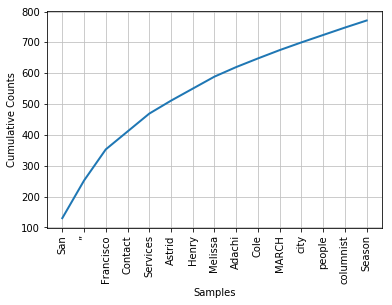

The words that occur only once in the us-world category is: ['Bridger', 'Weather', 'permitting', 'functions', 'Harlington', 'visiting', 'Seatt', 'Harling', 'opened', 'Str']
The long words of the text in the us-world category is: ['yet-to-be-identif', 'fourth-generation', 'www.seasonofsharing.org', 'garbage-truck-themed', 'irresponsibility', 'Suspicious-activity', 'Hernandez-Morales']


In [7]:
category3df = dataframes(category3url)
#print(category3df)

category3Text = category3df['text']
category3Text = category3Text.to_string()

stopwords2 = ["the", "a", "and", "or", "in", "of", "to", "an", "said", "about", "on", "...", ",", "___", "s",
             "The", "—", "``", "’", "'s", ":", "“", "About", ".", "are", "with", "14", "is", "that", "was", "at", 
             "for", "he", "I", "not", "who", "will", "also", "says", "t", "from", "were", "has", "(", "But", "AM"
             "'", "a.m.", "In", "it", "$", "As", "?", "time", "And","first", 
              
              "year", "like", "There", "That", "This", "new", "years","For", "We", "She","one", "Chronicle", "They", "th", "p.m.", "told", "he", "would", "He", "A", "AP", "''", ")", "It", "say", '"']
             
no_digits = []

for i in category3Text:
    if not i.isdigit():
        no_digits.append(i)

category3Text = ''.join(no_digits)

stopwords = nltk.corpus.stopwords.words("english")
words = nltk.word_tokenize(category3Text)
words = [w for w in words if w not in stopwords]
words = [w for w in words if w not in stopwords2]

fdist1 = FreqDist(words)

print("The top 30 most common words in the us-world category is:")
fd_most_common = fdist1.most_common(30)
print(fd_most_common)

#PLOT
fdist1.plot(15, cumulative=True)

#A hapax is a token that only occurs once within a document.
categort1hapaxes = fdist1.hapaxes()[:10]
print("The words that occur only once in the us-world category is:", categort1hapaxes)

#long words of a text
V = set(words)
long_words = [w for w in V if len(w) > 15]
print("The long words of the text in the us-world category is:", long_words)

# Conclusion

The way I performed this analysis was to keep adding words to my stopwords array along with nltk.stopwords to gain a more meaningful sense of what the main topic of the category is.
According to the analysis of the text of the recent articles based on frequency distribution, words that occur only once and long words, the most common topics covered are:
1) For category 1: us-world are - Smolett, Nigeria, Trump and Police. Lawyers and actors being a topic mentioned rarely.
2) For category 2: biz+tech are - San Francisco, Trump, Airbnb, hound, deal, rose. Men, gentlemen and traditional being a topic mentioned rarely.
3) For category 3: local are - San Francisco, columnist, City, People, Cole. Weather being a topic mentioned rarely.

The common theme among these topics are: San Francisco and Trump. 